# <p style="padding:20px;background-color:#075178;margin:0;color:white;font-family:newtimeroman;font-size:175%;text-align:center;border-radius:10px 10px;overflow:hidden;font-weight:500">Students Performance Analysis</p>


<p style="text-align:center; ">
<img src="https://media.licdn.com/dms/image/D5612AQHk3XhmJYscxw/article-cover_image-shrink_720_1280/0/1689002442611?e=2147483647&v=beta&t=5ZwQb_899uPZkzNhbDb23XgLK_B9N-LY7NScNfUypVs", style='width: 600px; height: 600px;'>
</p>

<a id="1"></a>
# <p style="padding:20px;background-color:#075178;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:10px 10px;overflow:hidden;font-weight:500">Step 1: Importing Libraries</p>

In [1]:
# import related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="2"></a>
# <p style="padding:20px;background-color:#075178;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:10px 10px;overflow:hidden;font-weight:500">Step 2: Load the Dataset</p>

In [2]:
# Reading the Students Performance in Exams data
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

**Quick Glimpse of the Dataset**

In [3]:
df.head(10).style.set_properties(**{"background-color": "#9BB3DF","color":"white","border": "1.5px  solid black"})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


<a id="3"></a>
# <p style="padding:20px;background-color:#075178;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:10px 10px;overflow:hidden;font-weight:500">Step 3: Exploratory Data Analysis</p>

**Understanding the DataFrame**

In [4]:
print(f"Shape Of The Dataset: {df.shape}")

Shape Of The Dataset: (1000, 8)


**Checking the Missing Value**

In [5]:
df.isnull().sum().to_frame().T.style.set_properties(**{"background-color": "#9BB3DF","color":"white","border": "1.5px  solid black"})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,0,0,0,0,0,0


**Checking the Outliers**

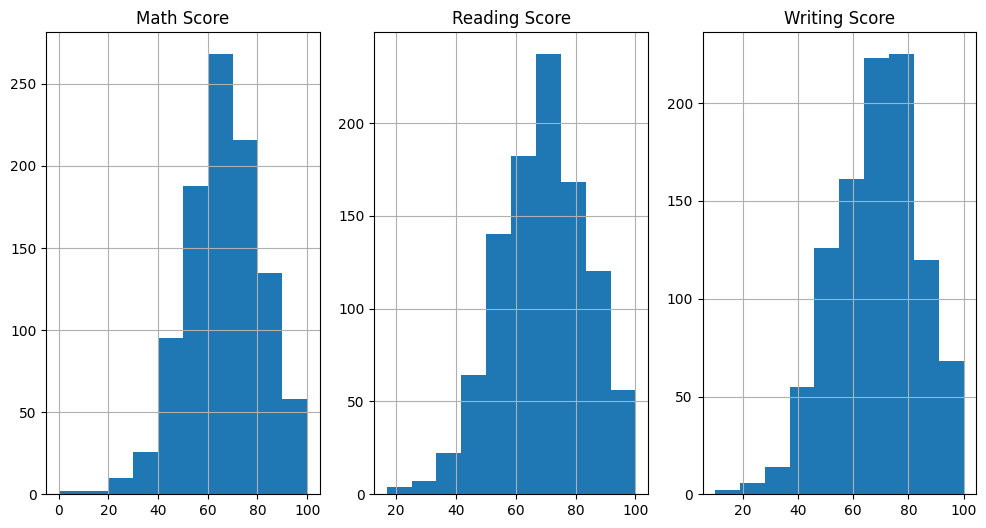

In [6]:
# Plot histograms for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
df['math score'].hist()
plt.title('Math Score')
plt.subplot(1, 3, 2)
df['reading score'].hist()
plt.title('Reading Score')
plt.subplot(1, 3, 3)
df['writing score'].hist()
plt.title('Writing Score')
plt.show()

**Detect Outliers Using Z-Score Method**

In [7]:
# Calculate z-scores for each numerical column
z_scores_math = np.abs((df['math score'] - df['math score'].mean()) / df['math score'].std())
z_scores_reading = np.abs((df['reading score'] - df['reading score'].mean()) / df['reading score'].std())
z_scores_writing = np.abs((df['writing score'] - df['writing score'].mean()) / df['writing score'].std())

# Define threshold for outliers
threshold = 3

# Identify outliers
outliers_math = df[z_scores_math > threshold]
outliers_reading = df[z_scores_reading > threshold]
outliers_writing = df[z_scores_writing > threshold]


**Printing Outliers and Number of Outliers**

In [8]:
# Print number of outliers
print("Number of outliers in Math Score:", len(outliers_math))
print("Number of outliers in Reading Score:", len(outliers_reading))
print("Number of outliers in Writing Score:", len(outliers_writing))
print()
print()

# Print outliers
print("Outliers in Math Score:")
print(outliers_math)
print()
print()
print("Outliers in Reading Score:")
print(outliers_reading)
print()
print()
print("Outliers in Writing Score:")
print(outliers_writing)

Number of outliers in Math Score: 4
Number of outliers in Reading Score: 4
Number of outliers in Writing Score: 4


Outliers in Math Score:
     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
787  female        group B                some college      standard   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
787                    none          19             38             32  
980                    none           8             24             23  


Outliers in Reading Score:
     gender race/ethnicity parental level of education         lunch  \
59   female        group C            

**Handling Outliers**

In [9]:
# Handle outliers (by removing it)
df_no_outliers = df[(z_scores_math <= threshold) & (z_scores_reading <= threshold) & (z_scores_writing <= threshold)]

**Visualize Data Without Outliers**

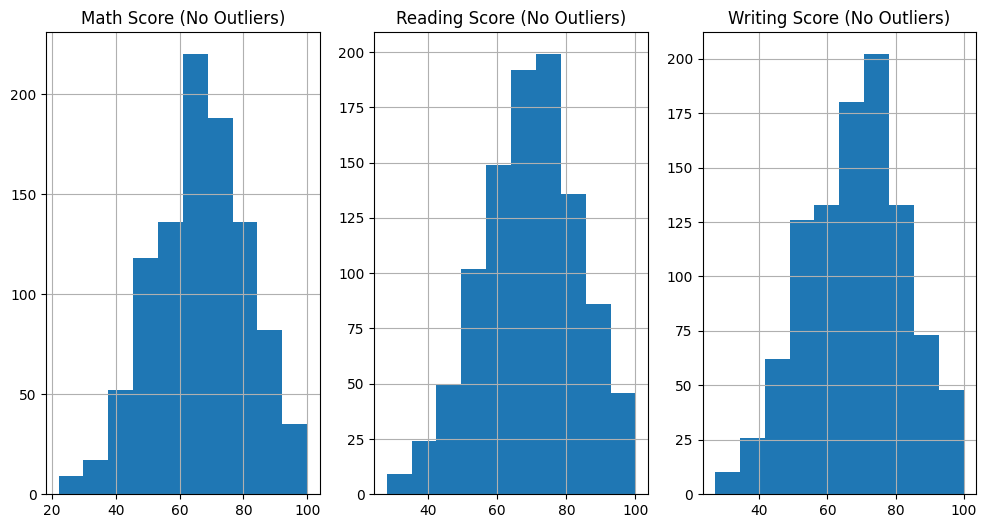

In [10]:
# Visualize the data without outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
df_no_outliers['math score'].hist()
plt.title('Math Score (No Outliers)')
plt.subplot(1, 3, 2)
df_no_outliers['reading score'].hist()
plt.title('Reading Score (No Outliers)')
plt.subplot(1, 3, 3)
df_no_outliers['writing score'].hist()
plt.title('Writing Score (No Outliers)')
plt.show()

**Checking Summary Statistics**

In [11]:
df.describe().style.set_properties(**{"background-color": "#9BB3DF", "color": "white", "border": "1.5px solid black"})

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.089000,69.169000,68.054000
std,15.163080,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


**Checking Data Types**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<a id="4"></a>
# <p style="padding:20px;background-color:#075178;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:10px 10px;overflow:hidden;font-weight:500">Step 4: Data Visualization</p>

#### **Distribution of Male and Female Students**

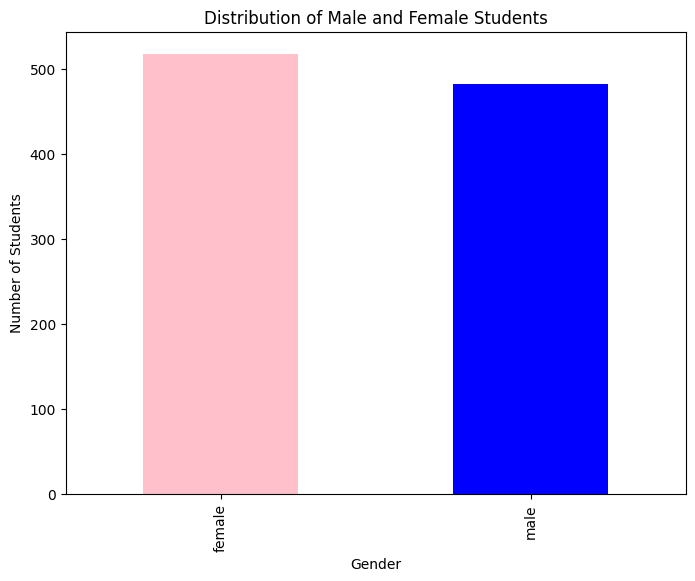

In [13]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['Pink', 'Blue'])
plt.title('Distribution of Male and Female Students')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

#### **Distribution of the Scores in Math, Reading, and Writing**

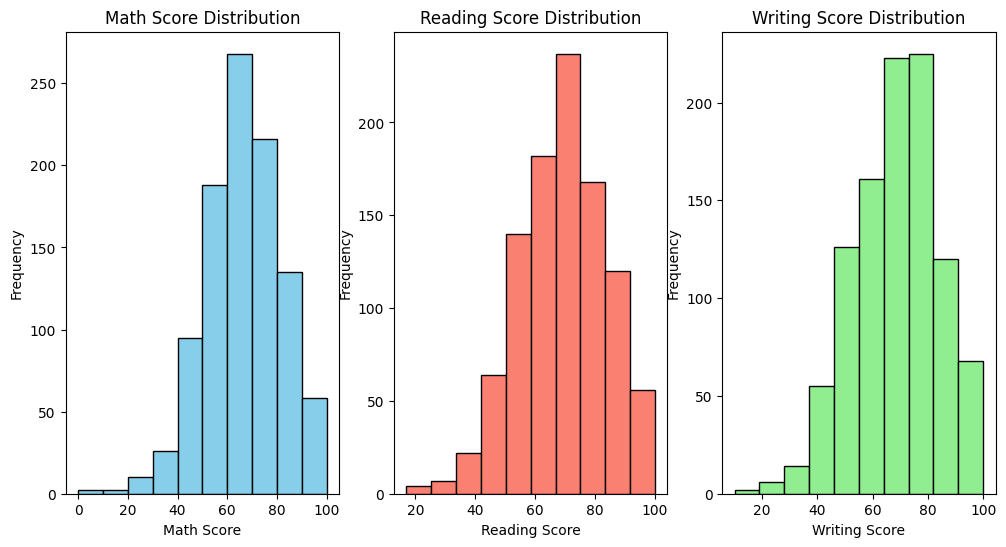

In [14]:
# Create subplots for each score
plt.figure(figsize=(12, 6))

# Histogram for Math Score
plt.subplot(1, 3, 1)
plt.hist(df['math score'], color='skyblue', edgecolor='black')
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Histogram for Reading Score
plt.subplot(1, 3, 2)
plt.hist(df['reading score'], color='salmon', edgecolor='black')
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# Histogram for Writing Score
plt.subplot(1, 3, 3)
plt.hist(df['writing score'], color='lightgreen', edgecolor='black')
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.show()

#### **Average scores in Math, Reading, and Writing**

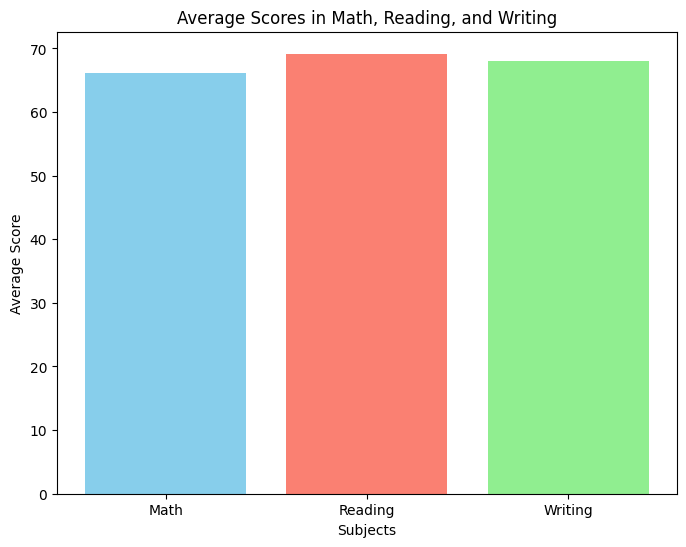

In [15]:
# Calculate average scores for each subject
avg_math_score = df['math score'].mean()
avg_reading_score = df['reading score'].mean()
avg_writing_score = df['writing score'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
subjects = ['Math', 'Reading', 'Writing']
average_scores = [avg_math_score, avg_reading_score, avg_writing_score]
plt.bar(subjects, average_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Scores in Math, Reading, and Writing')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.show()

#### **Relationship between Math, Reading, and Writing Scores**

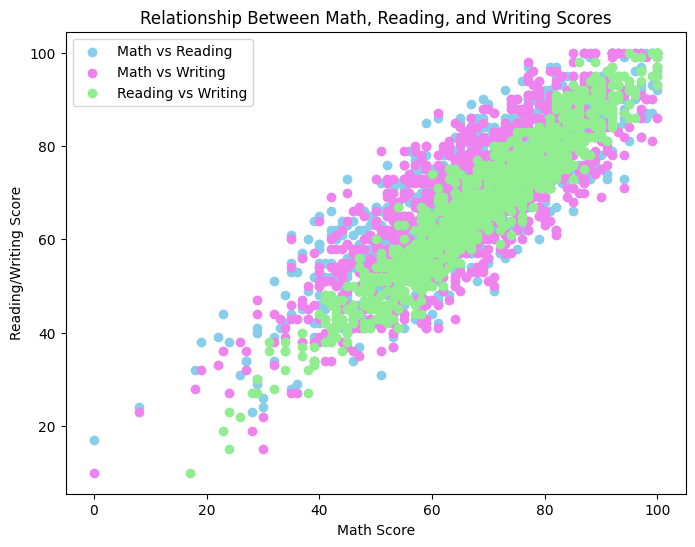

In [16]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['math score'], df['reading score'], color='skyblue', label='Math vs Reading')
plt.scatter(df['math score'], df['writing score'], color='violet', label='Math vs Writing')
plt.scatter(df['reading score'], df['writing score'], color='lightgreen', label='Reading vs Writing')

plt.title('Relationship Between Math, Reading, and Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading/Writing Score')
plt.legend()
plt.show()

<a id="5"></a>
# <p style="padding:20px;background-color:#075178;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:10px 10px;overflow:hidden;font-weight:500">Step 5: Basic Statistical Analysis</p>

#### **Calculate Mean, Median, and Mode for Math, Reading, and Writing Scores**

In [17]:
# Calculate mean, median, and mode for math scores
math_mean = df['math score'].mean()
math_median = df['math score'].median()
math_mode = df['math score'].mode().iloc[0]

# Calculate mean, median, and mode for reading scores
reading_mean = df['reading score'].mean()
reading_median = df['reading score'].median()
reading_mode = df['reading score'].mode().iloc[0]

# Calculate mean, median, and mode for writing scores
writing_mean = df['writing score'].mean()
writing_median = df['writing score'].median()
writing_mode = df['writing score'].mode().iloc[0]

# Print the results
print("Math Scores")
print("Mean:", math_mean)
print("Median:", math_median)
print("Mode:", math_mode)
print()
print("Reading Scores")
print("Mean:", reading_mean)
print("Median:", reading_median)
print("Mode:", reading_mode)
print()
print("Writing Scores")
print("Mean:", writing_mean)
print("Median:", writing_median)
print("Mode:", writing_mode)


Math Scores
Mean: 66.089
Median: 66.0
Mode: 65

Reading Scores
Mean: 69.169
Median: 70.0
Mode: 72

Writing Scores
Mean: 68.054
Median: 69.0
Mode: 74


#### **Calculate the Standard Deviation for Math, Reading, and Writing Scores**

In [18]:
# Calculate standard deviation for math, reading, and writing scores
math_std = df['math score'].std()
reading_std = df['reading score'].std()
writing_std = df['writing score'].std()

# Print the results
print("Standard Deviation for Math Scores: {:.2f}".format(math_std))
print("Standard Deviation for Reading Scores: {:.2f}".format(reading_std))
print("Standard Deviation for Writing Scores: {:.2f}".format(writing_std))

Standard Deviation for Math Scores: 15.16
Standard Deviation for Reading Scores: 14.60
Standard Deviation for Writing Scores: 15.20


#### **Performing T-test: Male and Female Students' Performance in Math, Reading, Writing**

In [19]:
from scipy.stats import ttest_ind

# Separate scores for male and female students
male_math_scores = df[df['gender'] == 'male']['math score']
female_math_scores = df[df['gender'] == 'female']['math score']

male_reading_scores = df[df['gender'] == 'male']['reading score']
female_reading_scores = df[df['gender'] == 'female']['reading score']

male_writing_scores = df[df['gender'] == 'male']['writing score']
female_writing_scores = df[df['gender'] == 'female']['writing score']

# Perform t-test for math scores
math_t_stat, math_p_value = ttest_ind(male_math_scores, female_math_scores)

# Perform t-test for reading scores
reading_t_stat, reading_p_value = ttest_ind(male_reading_scores, female_reading_scores)

# Perform t-test for writing scores
writing_t_stat, writing_p_value = ttest_ind(male_writing_scores, female_writing_scores)

# Print the results
print("Math Scores")
print("t-statistic:", math_t_stat)
print("p-value:", math_p_value)
if math_p_value < 0.05:
    print("There is a significant difference between male and female students' math scores.")
else:
    print("There is no significant difference between male and female students' math scores.")

print("\nReading Scores")
print("t-statistic:", reading_t_stat)
print("p-value:", reading_p_value)
if reading_p_value < 0.05:
    print("There is a significant difference between male and female students' reading scores.")
else:
    print("There is no significant difference between male and female students' reading scores.")

print("\nWriting Scores")
print("t-statistic:", writing_t_stat)
print("p-value:", writing_p_value)
if writing_p_value < 0.05:
    print("There is a significant difference between male and female students' writing scores.")
else:
    print("There is no significant difference between male and female students' writing scores.")

Math Scores
t-statistic: 5.383245869828983
p-value: 9.120185549328822e-08
There is a significant difference between male and female students' math scores.

Reading Scores
t-statistic: -7.959308005187657
p-value: 4.680538743933289e-15
There is a significant difference between male and female students' reading scores.

Writing Scores
t-statistic: -9.979557910004507
p-value: 2.019877706867934e-22
There is a significant difference between male and female students' writing scores.


<a id="6"></a>
# <p style="padding:20px;background-color:#075178;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:10px 10px;overflow:hidden;font-weight:500">Step 6: Document the Findings</p>

> Add later on